#### Задание 3.1
###### Используя таблицу значений Уi, функции у = f(х), вычисленных в точках Хi, і = 0, ., 3, построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки {Хi, Үi}. Вычислить значение погрешности Δ(у(Х*)) интерполяции в точке Х*. Сравнить погрешности метода с оценкой

###### *По списку мой вариант - 34, но в задачнике всего 30 вариантов. Взяла вариант №4.

##### Определяем функцию, точки интерполяции

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 1 / np.tan(x)

X = np.array([np.pi/8, 2*np.pi/8, 3*np.pi/8, 4*np.pi/8])
Y = f(X)

X_star = np.pi / 3

##### Определяем многочлены Лагранжа и Ньютона

In [2]:
def lagrange_interpolation(X, Y, x):
    n = len(X)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - X[j]) / (X[i] - X[j])
        P += Y[i] * L
    return P


def newton_interpolation(X, Y, x):
    n = len(X)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = Y
    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i][j] = (divided_diff[i + 1][j - 1] - divided_diff[i][j - 1]) / (X[i + j] - X[i])
    
    P = divided_diff[0][0]
    for j in range(1, n):
        term = divided_diff[0][j]
        for i in range(j):
            term *= (x - X[i])
        P += term
    return P

##### Вычисляем значения интерполяционных многочленов, истинное значение функции и погрешности

In [3]:

P_lagrange = lagrange_interpolation(X, Y, X_star)
P_newton = newton_interpolation(X, Y, X_star)


true_value = f(X_star)


error_lagrange = abs(true_value - P_lagrange)
error_newton = abs(true_value - P_newton)

##### Погрешность

In [6]:
import math 

M = np.max(np.abs(-1/np.sin(X)**2 * (1/np.tan(X))))
n = len(X) - 1
w = np.prod([X_star - X[i] for i in range(n + 1)])  # w_n+1(X*)
error_bound = (M / math.factorial(n + 1)) * abs(w)

##### Результаты

Значение функции в точке X*: 0.577350269189626
Интерполяция Лагранжа: 0.5579748085542386, Погрешность: 0.01937546063538731
Интерполяция Ньютона: 0.5579748085542388, Погрешность: 0.0193754606353872
Оценка погрешности: 0.008066769316769697


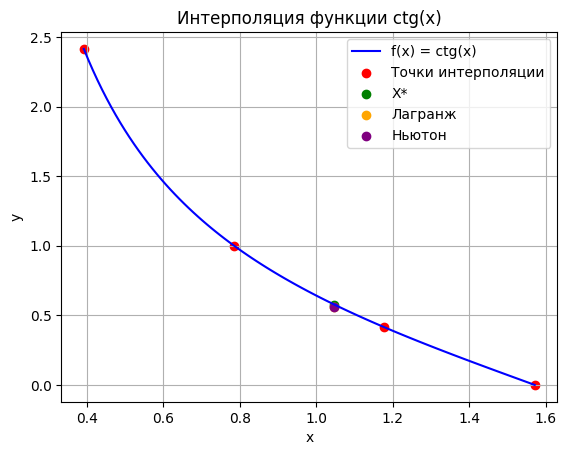

In [7]:
print(f"Значение функции в точке X*: {true_value}")
print(f"Интерполяция Лагранжа: {P_lagrange}, Погрешность: {error_lagrange}")
print(f"Интерполяция Ньютона: {P_newton}, Погрешность: {error_newton}")
print(f"Оценка погрешности: {error_bound}")

x_vals = np.linspace(np.pi/8, np.pi/2, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = ctg(x)', color='blue')
plt.scatter(X, Y, color='red', label='Точки интерполяции')
plt.scatter(X_star, true_value, color='green', label='X*')
plt.scatter(X_star, P_lagrange, color='orange', label='Лагранж')
plt.scatter(X_star, P_newton, color='purple', label='Ньютон')
plt.legend()
plt.title('Интерполяция функции ctg(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()